# The Sparks Foundation

# Name:Hiten Khuman

# Task 2:Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

# Step-1:Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Step-2:Loading Dataset

In [2]:
data=pd.read_csv("iris.csv")

# Step-3:Analyze the Data

In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Step-4:Determine the Value of K

In [7]:
X=data.iloc[:,1:-1].values
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

Text(0, 0.5, 'Within Cluster Sum of Squares')

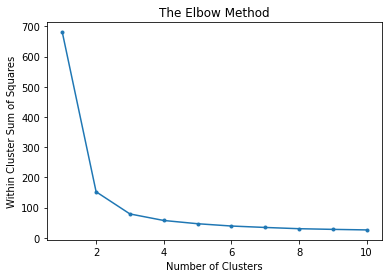

In [8]:
plt.plot(range(1,11),wcss,marker='.')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")

It can be seen from above plot that the elbow occues at k=3.So,we choose number of cluster as 3.

# Step-5:Train the Model

In [9]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

# Step-6:Visualising the Clusters

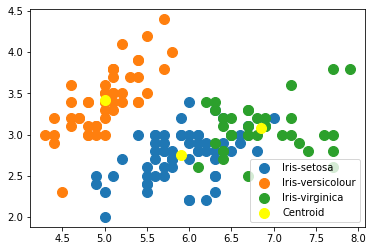

In [10]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100, label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100, label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100, label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroid')

plt.legend()
